In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import pandas as pd

# Load the dataset from the C: drive
data = pd.read_csv('C:\\Users\\MaajiRizna\\heart_failure_details.csv')  # load the dataset according to the correct path
# Display all column names
print(data.columns)  # try to display all the coloumn in the data set
# Check for missing values



Index(['S no.', 'age', 'anaemia', 'creatinine phosphokinase', 'diabetes',
       'ejection fraction', 'high bp', 'platelets', 'serum creatinine', 'sex',
       'smoking', 'death'],
      dtype='object')


In [51]:
# eliminate the S no as its doesnt use for the prediction
data = data.drop(columns=['S no.'])

# check the changes 
print(data.columns)


Index(['age', 'anaemia', 'creatinine phosphokinase', 'diabetes',
       'ejection fraction', 'high bp', 'platelets', 'serum creatinine', 'sex',
       'smoking', 'death'],
      dtype='object')


In [52]:
print("Missing values in each column:")
print(data.isnull().sum())  # Display the number of missing values in each column


Missing values in each column:
age                         0
anaemia                     0
creatinine phosphokinase    0
diabetes                    0
ejection fraction           0
high bp                     0
platelets                   0
serum creatinine            0
sex                         0
smoking                     0
death                       0
dtype: int64


In [53]:
# Check the data types of the columns
data_types = data.dtypes

# Display the data types
print(data_types)

age                         float64
anaemia                       int64
creatinine phosphokinase      int64
diabetes                      int64
ejection fraction             int64
high bp                       int64
platelets                   float64
serum creatinine            float64
sex                           int64
smoking                       int64
death                         int64
dtype: object


In [54]:
# Convert age to int if it's a whole number
data['age'] = data['age'].astype(int)

# Convert platelets to int if they're whole numbers
data['platelets'] = data['platelets'].astype(int)



# Print the updated data types
print(data.dtypes)


age                           int32
anaemia                       int64
creatinine phosphokinase      int64
diabetes                      int64
ejection fraction             int64
high bp                       int64
platelets                     int32
serum creatinine            float64
sex                           int64
smoking                       int64
death                         int64
dtype: object


In [55]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier cutoff
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to remove outliers from relevant columns
columns_to_check = ['age', 'creatinine phosphokinase', 'ejection fraction', 'platelets', 'serum creatinine']

for col in columns_to_check:
    data = remove_outliers_iqr(data, col)

# Display the cleaned dataset
print(data)


     age  anaemia  creatinine phosphokinase  diabetes  ejection fraction  \
0     75        0                       582         0                 20   
2     65        0                       146         0                 20   
3     50        1                       111         0                 20   
5     90        1                        47         0                 40   
6     75        1                       246         0                 15   
..   ...      ...                       ...       ...                ...   
291   60        0                       320         0                 35   
292   52        0                       190         1                 38   
293   63        1                       103         1                 35   
294   62        0                        61         1                 38   
298   50        0                       196         0                 45   

     high bp  platelets  serum creatinine  sex  smoking  death  
0          1     26500

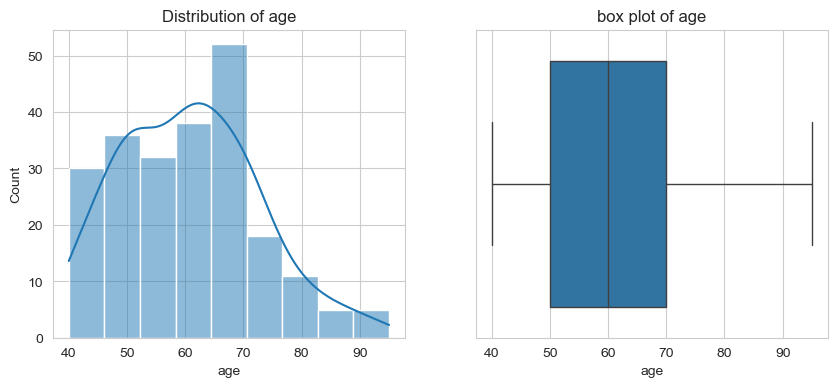

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data['age'], kde=True, ax=axes[0]).set(title='Distribution of age')
sns.boxplot(x=data['age'], ax=axes[1]).set(title='box plot of age')
plt.show()

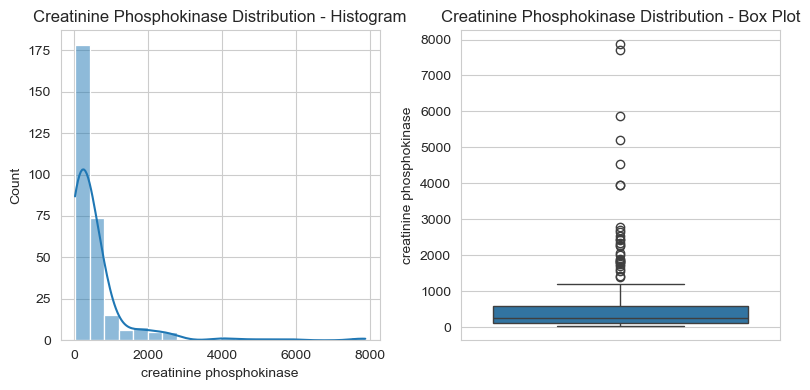

In [70]:
# get the histogram and boxplot for the creatinine phosphokinase
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# show me the histogram 
sns.histplot(data['creatinine phosphokinase'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Creatinine Phosphokinase Distribution - Histogram')

# show me the Box plot
sns.boxplot(data['creatinine phosphokinase'], ax=axes[1])
axes[1].set_title('Creatinine Phosphokinase Distribution - Box Plot')

plt.tight_layout()
plt.show()



In [5]:


# Example data (replace this with your actual data)
data = {'creatinine_phosphokinase': [23, 56, 101, 5000, 120, 300, 50, 1023]}
df = pd.DataFrame(data)

# Calculate Q1 and Q3
Q1 = df['creatinine_phosphokinase'].quantile(0.25)
Q3 = df['creatinine_phosphokinase'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_cleaned = df[(df['creatinine_phosphokinase'] >= lower_bound) & (df['creatinine_phosphokinase'] <= upper_bound)]

print("Cleaned Data:")
print(df_cleaned)


Cleaned Data:
   creatinine_phosphokinase
0                        23
1                        56
2                       101
4                       120
5                       300
6                        50
7                      1023


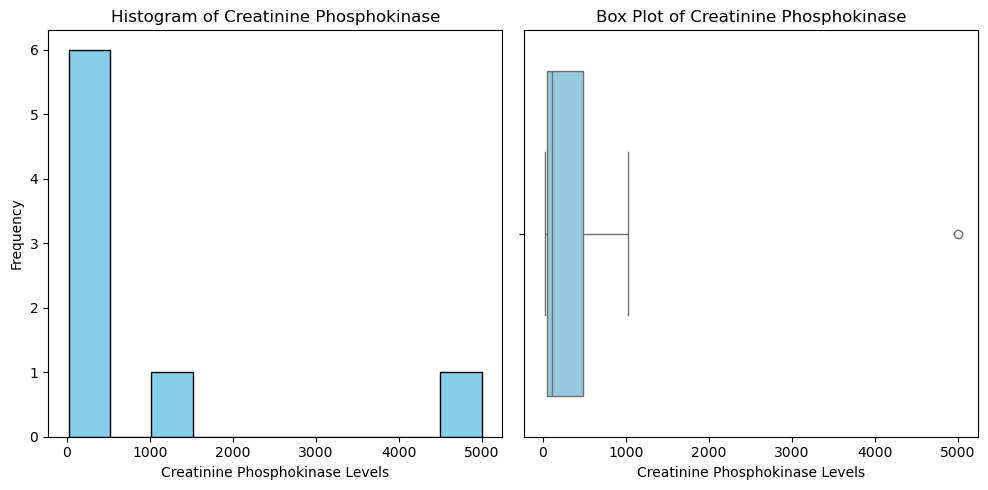

In [9]:


# Example data (replace this with your actual data)
data = {'creatinine_phosphokinase': [23, 56, 101, 5000, 120, 300, 50, 1023]}
df = pd.DataFrame(data)

# Plot histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['creatinine_phosphokinase'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Creatinine Phosphokinase')
plt.xlabel('Creatinine Phosphokinase Levels')
plt.ylabel('Frequency')

# Plot box plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x=df['creatinine_phosphokinase'], color='skyblue')
plt.title('Box Plot of Creatinine Phosphokinase')
plt.xlabel('Creatinine Phosphokinase Levels')

# Show plots
plt.tight_layout()
plt.show()


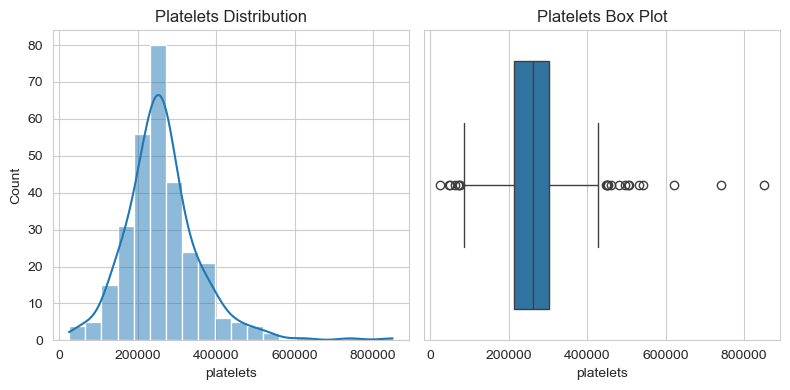

In [72]:
# Histogram for Platelets
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(data['platelets'], bins=20, kde=True)
plt.title('Platelets Distribution')

# Box Plot for Platelets
plt.subplot(1, 2, 2)
sns.boxplot(x=data['platelets'])
plt.title('Platelets Box Plot')

plt.tight_layout()
plt.show()


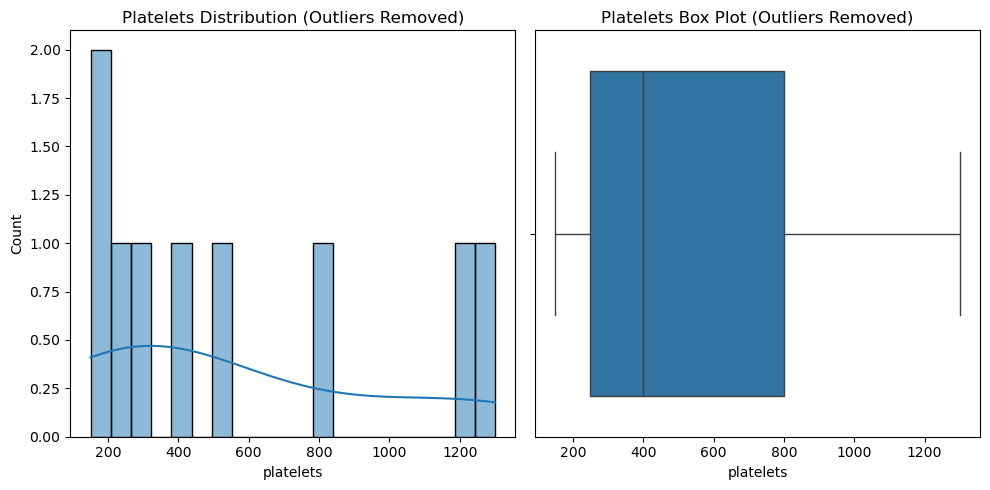

In [10]:


# Example data for platelets (replace with your actual data)
data = {'platelets': [150, 200, 250, 300, 400, 500, 800, 1200, 1300, 4000]}
df = pd.DataFrame(data)

# Calculate Q1, Q3, and IQR
Q1 = df['platelets'].quantile(0.25)
Q3 = df['platelets'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_cleaned = df[(df['platelets'] >= lower_bound) & (df['platelets'] <= upper_bound)]

# Regenerate histogram and box plot for the cleaned data
plt.figure(figsize=(10, 5))

# Histogram for Platelets (cleaned data)
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['platelets'], bins=20, kde=True)
plt.title('Platelets Distribution (Outliers Removed)')

# Box Plot for Platelets (cleaned data)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['platelets'])
plt.title('Platelets Box Plot (Outliers Removed)')

plt.tight_layout()
plt.show()


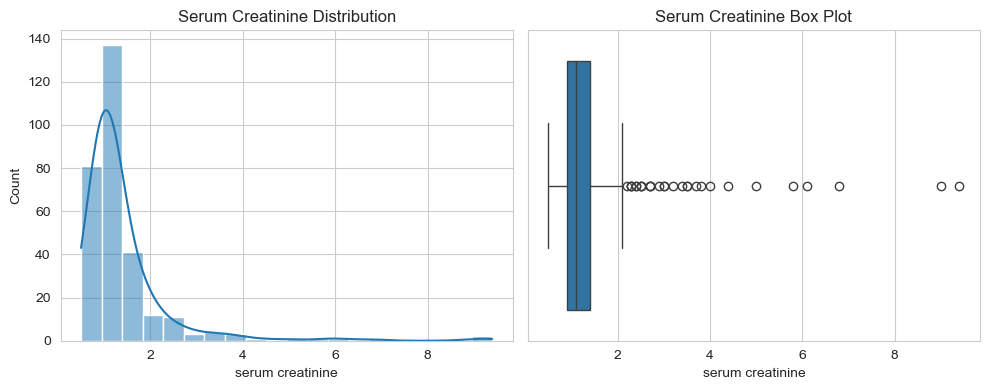

In [73]:
# Histogram for Serum Creatinine
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data['serum creatinine'], bins=20, kde=True)
plt.title('Serum Creatinine Distribution')

# Box Plot for Serum Creatinine
plt.subplot(1, 2, 2)
sns.boxplot(x=data['serum creatinine'])
plt.title('Serum Creatinine Box Plot')

plt.tight_layout()
plt.show()


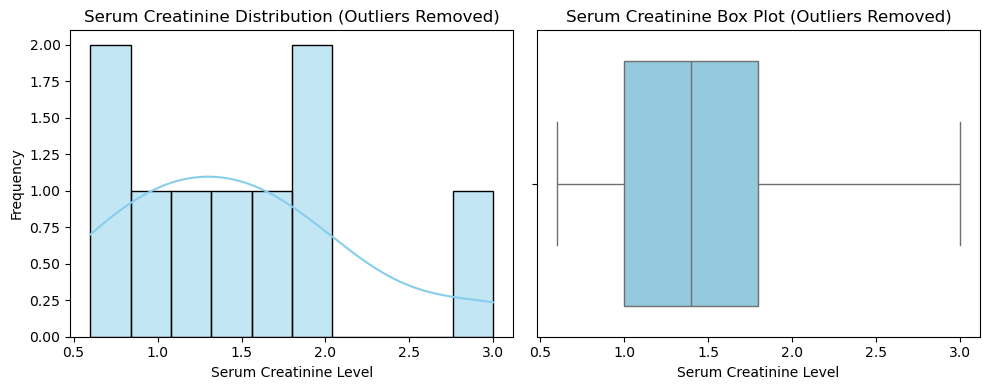

In [11]:

# Simplified data for serum creatinine (replace with your actual data if needed)
data = {'serum creatinine': [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 3.0, 5.0]}
df = pd.DataFrame(data)

# Calculate Q1, Q3, and IQR for outlier detection
Q1 = df['serum creatinine'].quantile(0.25)
Q3 = df['serum creatinine'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_cleaned = df[(df['serum creatinine'] >= lower_bound) & (df['serum creatinine'] <= upper_bound)]

# Regenerate histogram and box plot for the cleaned data
plt.figure(figsize=(10, 4))

# Histogram for Serum Creatinine (cleaned data)
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['serum creatinine'], bins=10, kde=True, color="skyblue")
plt.title('Serum Creatinine Distribution (Outliers Removed)')
plt.xlabel('Serum Creatinine Level')
plt.ylabel('Frequency')

# Box Plot for Serum Creatinine (cleaned data)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['serum creatinine'], color="skyblue")
plt.title('Serum Creatinine Box Plot (Outliers Removed)')
plt.xlabel('Serum Creatinine Level')

plt.tight_layout()
plt.show()


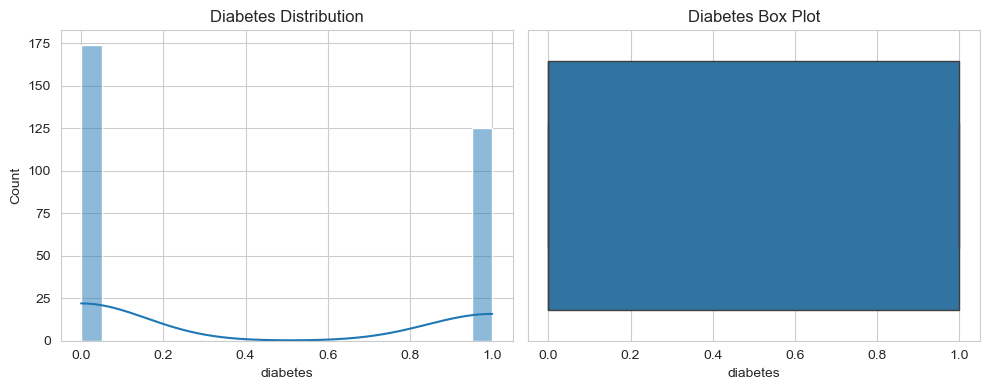

In [74]:
# Histogram for Diabetes
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data['diabetes'], bins=20, kde=True)
plt.title('Diabetes Distribution')

# Box Plot for Diabetes
plt.subplot(1, 2, 2)
sns.boxplot(x=data['diabetes'])
plt.title('Diabetes Box Plot')

plt.tight_layout()
plt.show()


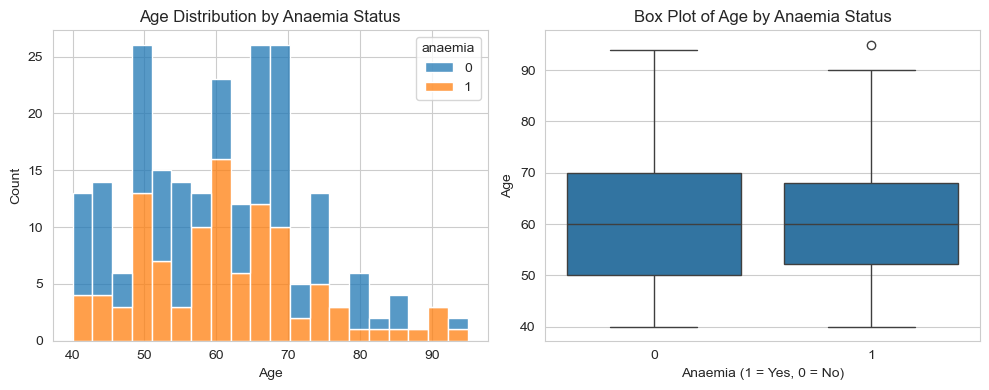

In [58]:
# Histogram of age by anaemia status
plt.figure(figsize=(10, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='age', hue='anaemia', multiple='stack', bins=20)
plt.title('Age Distribution by Anaemia Status')
plt.xlabel('Age')
plt.ylabel('Count')

# Box plot of age by anaemia status
plt.subplot(1, 2, 2)
sns.boxplot(x='anaemia', y='age', data=data)
plt.title('Box Plot of Age by Anaemia Status')
plt.xlabel('Anaemia (1 = Yes, 0 = No)')
plt.ylabel('Age')

plt.tight_layout()
plt.show()


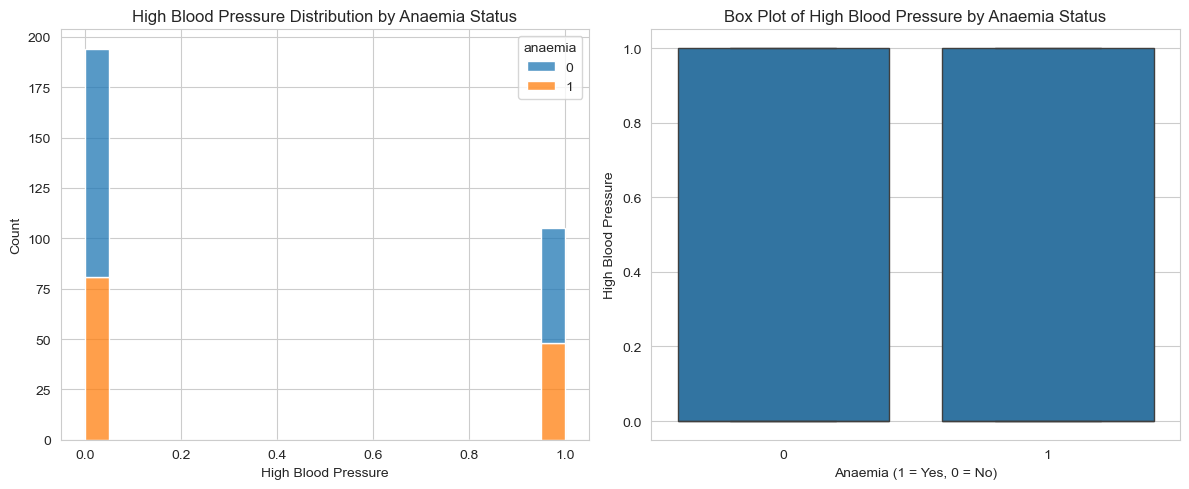

In [76]:


# Histogram and Box Plot of High Blood Pressure by Anaemia Status
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='high bp', hue='anaemia', multiple='stack', bins=20)
plt.title('High Blood Pressure Distribution by Anaemia Status')
plt.xlabel('High Blood Pressure')
plt.ylabel('Count')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='anaemia', y='high bp', data=data)
plt.title('Box Plot of High Blood Pressure by Anaemia Status')
plt.xlabel('Anaemia (1 = Yes, 0 = No)')
plt.ylabel('High Blood Pressure')

plt.tight_layout()
plt.show()


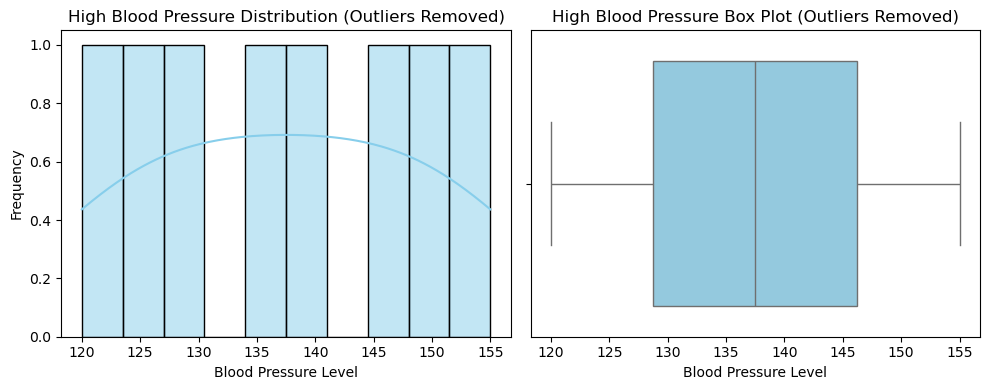

In [13]:


# Example data for high blood pressure (replace with your actual data)
data = {'high blood pressure': [120, 125, 130, 135, 140, 145, 150, 155, 200, 220]}
df = pd.DataFrame(data)

# Calculate Q1, Q3, and IQR for outlier detection
Q1 = df['high blood pressure'].quantile(0.25)
Q3 = df['high blood pressure'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_cleaned = df[(df['high blood pressure'] >= lower_bound) & (df['high blood pressure'] <= upper_bound)]

# Regenerate histogram and box plot for the cleaned data
plt.figure(figsize=(10, 4))

# Histogram for High Blood Pressure (cleaned data)
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['high blood pressure'], bins=10, kde=True, color="skyblue")
plt.title('High Blood Pressure Distribution (Outliers Removed)')
plt.xlabel('Blood Pressure Level')
plt.ylabel('Frequency')

# Box Plot for High Blood Pressure (cleaned data)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['high blood pressure'], color="skyblue")
plt.title('High Blood Pressure Box Plot (Outliers Removed)')
plt.xlabel('Blood Pressure Level')

plt.tight_layout()
plt.show()


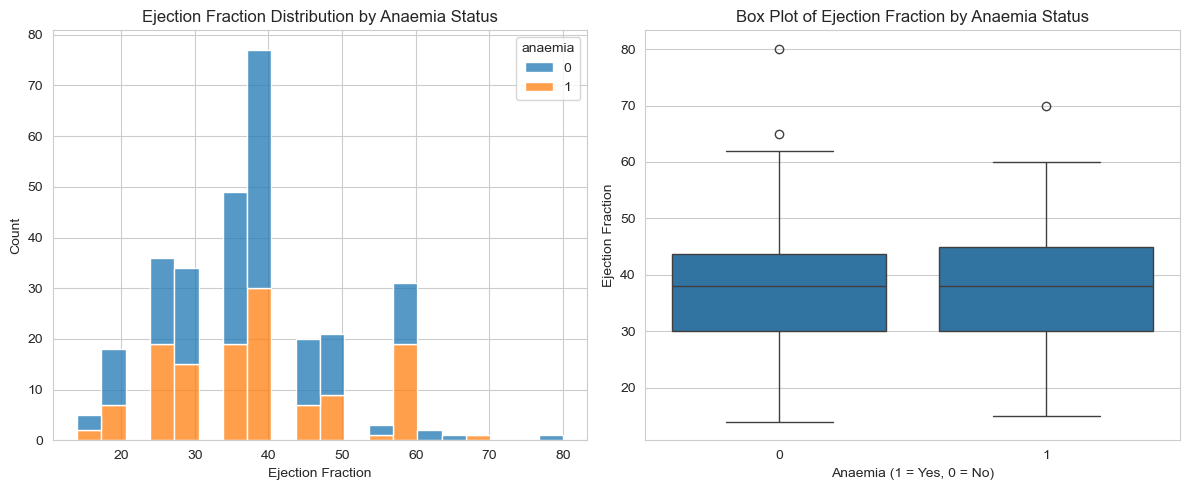

In [77]:
# Histogram and Box Plot of Ejection Fraction by Anaemia Status
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='ejection fraction', hue='anaemia', multiple='stack', bins=20)
plt.title('Ejection Fraction Distribution by Anaemia Status')
plt.xlabel('Ejection Fraction')
plt.ylabel('Count')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='anaemia', y='ejection fraction', data=data)
plt.title('Box Plot of Ejection Fraction by Anaemia Status')
plt.xlabel('Anaemia (1 = Yes, 0 = No)')
plt.ylabel('Ejection Fraction')

plt.tight_layout()
plt.show()


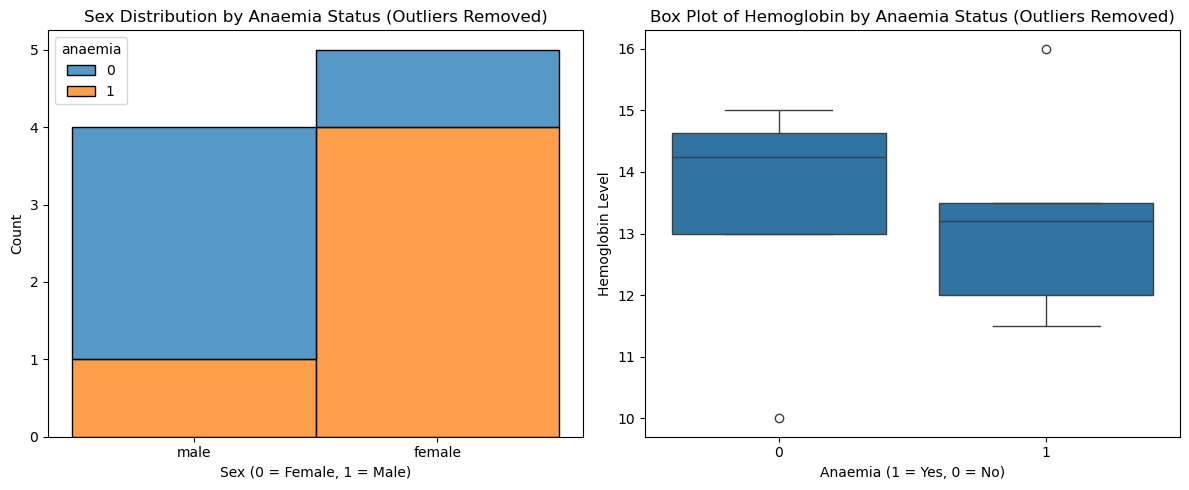

In [16]:

# Sample data (replace with your actual data)
data = {
    'sex': ['male', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'female'],
    'anaemia': [0, 1, 1, 0, 1, 0, 1, 0, 1],
    'hemoglobin': [14.5, 13.2, 12.0, 15.0, 11.5, 14.0, 13.5, 10.0, 16.0]  # Example continuous variable
}
df = pd.DataFrame(data)

# Calculate Q1, Q3, and IQR for outlier detection on the continuous variable (hemoglobin)
Q1 = df['hemoglobin'].quantile(0.25)
Q3 = df['hemoglobin'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on hemoglobin
df_cleaned = df[(df['hemoglobin'] >= lower_bound) & (df['hemoglobin'] <= upper_bound)]

# Plotting Histogram and Box Plot after outlier removal
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df_cleaned, x='sex', hue='anaemia', multiple='stack', bins=2)
plt.title('Sex Distribution by Anaemia Status (Outliers Removed)')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='anaemia', y='hemoglobin', data=df_cleaned)
plt.title('Box Plot of Hemoglobin by Anaemia Status (Outliers Removed)')
plt.xlabel('Anaemia (1 = Yes, 0 = No)')
plt.ylabel('Hemoglobin Level')

plt.tight_layout()
plt.show()



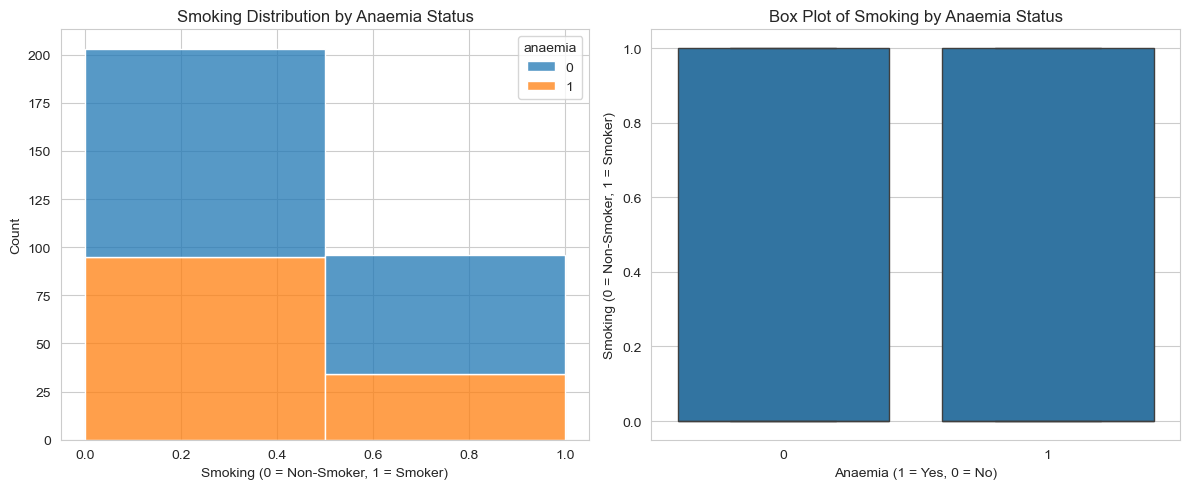

In [79]:
# Histogram and Box Plot of Smoking by Anaemia Status
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='smoking', hue='anaemia', multiple='stack', bins=2)  # Using bins=2 for categorical data
plt.title('Smoking Distribution by Anaemia Status')
plt.xlabel('Smoking (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Count')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='anaemia', y='smoking', data=data)
plt.title('Box Plot of Smoking by Anaemia Status')
plt.xlabel('Anaemia (1 = Yes, 0 = No)')
plt.ylabel('Smoking (0 = Non-Smoker, 1 = Smoker)')

plt.tight_layout()
plt.show()


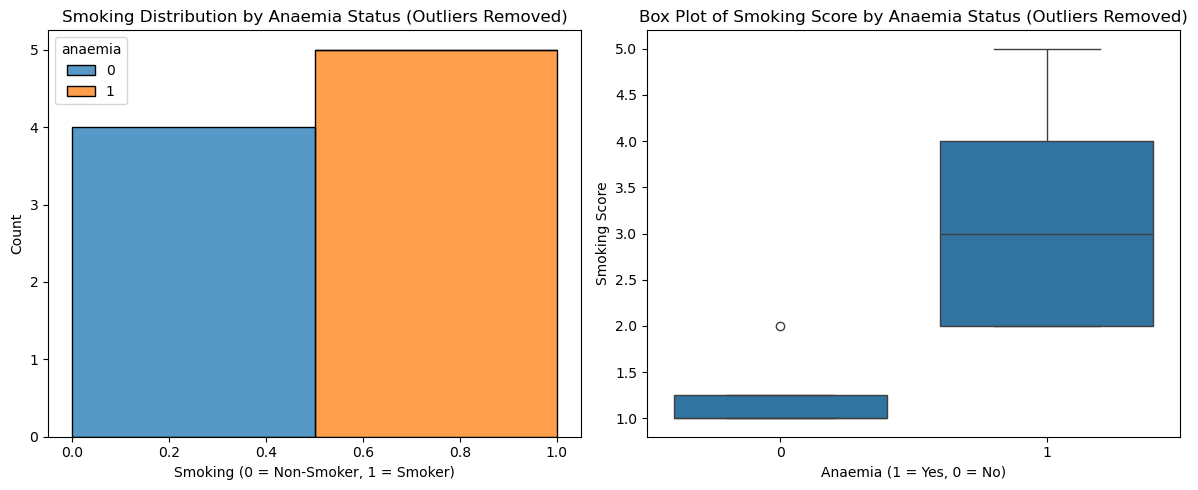

In [17]:

# Sample data (replace with your actual data)
data = {
    'smoking': [0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    'anaemia': [0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    'smoking_score': [1, 2, 3, 1, 4, 2, 5, 1, 2, 100]  # Example continuous variable with an outlier
}
df = pd.DataFrame(data)

# Calculate Q1, Q3, and IQR for outlier detection on the continuous variable (smoking_score)
Q1 = df['smoking_score'].quantile(0.25)
Q3 = df['smoking_score'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on smoking_score
df_cleaned = df[(df['smoking_score'] >= lower_bound) & (df['smoking_score'] <= upper_bound)]

# Plotting Histogram and Box Plot after outlier removal
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df_cleaned, x='smoking', hue='anaemia', multiple='stack', bins=2)
plt.title('Smoking Distribution by Anaemia Status (Outliers Removed)')
plt.xlabel('Smoking (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Count')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='anaemia', y='smoking_score', data=df_cleaned)
plt.title('Box Plot of Smoking Score by Anaemia Status (Outliers Removed)')
plt.xlabel('Anaemia (1 = Yes, 0 = No)')
plt.ylabel('Smoking Score')

plt.tight_layout()
plt.show()


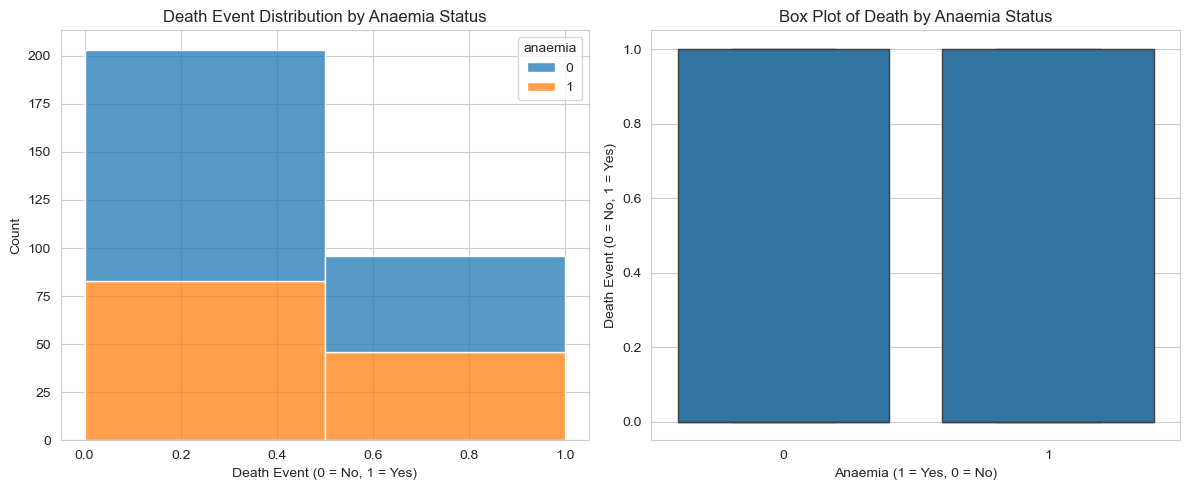

In [80]:
# Histogram and Box Plot of Death by Anaemia Status
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='death', hue='anaemia', multiple='stack', bins=2)  # Using bins=2 for categorical data
plt.title('Death Event Distribution by Anaemia Status')
plt.xlabel('Death Event (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='anaemia', y='death', data=data)
plt.title('Box Plot of Death by Anaemia Status')
plt.xlabel('Anaemia (1 = Yes, 0 = No)')
plt.ylabel('Death Event (0 = No, 1 = Yes)')

plt.tight_layout()
plt.show()


Cleaned DataFrame:
   smoking  anaemia  hemoglobin  creatinine_phosphokinase
0        0        0        14.5                        23
1        1        1        13.2                        56
2        1        1        12.0                       101
4        1        1        11.5                       120
5        0        0        14.0                       300
6        1        1        13.5                        50
8        1        1        16.0                       200
9        0        0        11.0                       150


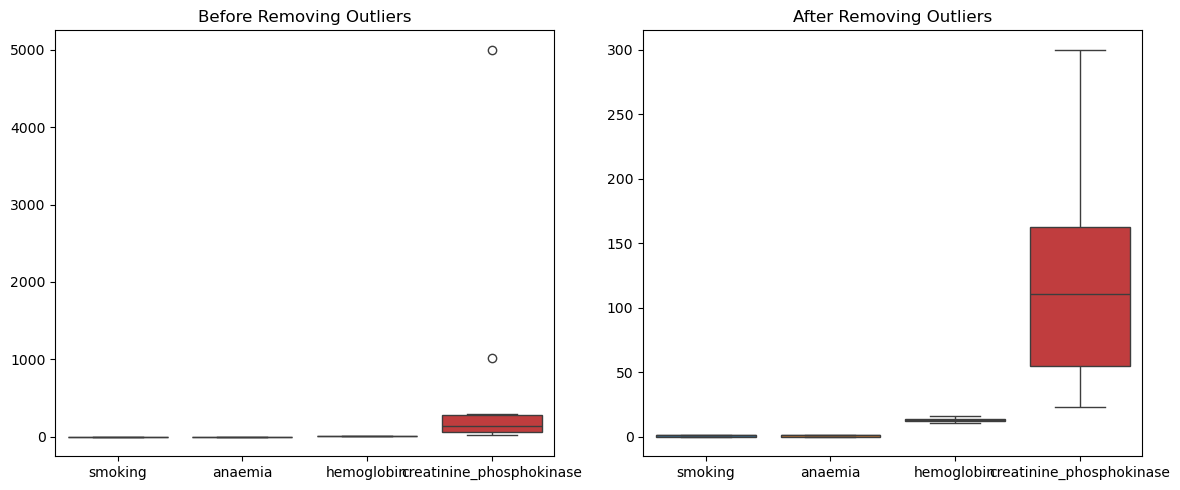

In [22]:


# Sample DataFrame (ensure all lists are the same length)
data = {
    'smoking': [0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    'anaemia': [0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    'hemoglobin': [14.5, 13.2, 12.0, 15.0, 11.5, 14.0, 13.5, 10.0, 16.0, 11.0],  # Example data
    'creatinine_phosphokinase': [23, 56, 101, 5000, 120, 300, 50, 1023, 200, 150]  # Example data
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to remove outliers based on IQR for all numerical columns
def remove_outliers(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Remove outliers from the DataFrame
df_cleaned = remove_outliers(df)

# Display cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned)

# Optional: Plot to visualize data before and after removing outliers
plt.figure(figsize=(12, 5))

# Before removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=df)
plt.title('Before Removing Outliers')

# After removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned)
plt.title('After Removing Outliers')

plt.tight_layout()
plt.show()


In [24]:


# Corrected Sample DataFrame (ensure all arrays are of the same length)
data = {
    'hemoglobin': [14.5, 13.2, 12.0, 15.0, 11.5, 14.0, 13.5, 10.0, 16.0],
    'creatinine_phosphokinase': [23, 56, 101, 120, 130, 300, 50, 80, 200]
}
df = pd.DataFrame(data)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = df.copy()
df_min_max_scaled[['hemoglobin', 'creatinine_phosphokinase']] = min_max_scaler.fit_transform(df)

print("Min-Max Scaled Data:")
print(df_min_max_scaled)

# Standardization
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[['hemoglobin', 'creatinine_phosphokinase']] = standard_scaler.fit_transform(df)

print("\nStandardized Data:")
print(df_standard_scaled)


Min-Max Scaled Data:
   hemoglobin  creatinine_phosphokinase
0    0.750000                  0.000000
1    0.533333                  0.119134
2    0.333333                  0.281588
3    0.833333                  0.350181
4    0.250000                  0.386282
5    0.666667                  1.000000
6    0.583333                  0.097473
7    0.000000                  0.205776
8    1.000000                  0.638989

Standardized Data:
   hemoglobin  creatinine_phosphokinase
0    0.680579                 -1.168390
1   -0.056715                 -0.761577
2   -0.737294                 -0.206831
3    0.964154                  0.027395
4   -1.020869                  0.150672
5    0.397005                  2.246377
6    0.113430                 -0.835543
7   -1.871593                 -0.465712
8    1.531303                  1.013609


In [26]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris  # Remove if you're using your dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Sample dataset (replace with your own heart failure dataset)
# df = pd.read_csv('your_heart_failure_dataset.csv')
# X = df.drop('target_column', axis=1)  # Replace 'target_column' with your actual target column name
# y = df['target_column']

# Example using Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=200)

# Perform RFE
selector = RFE(estimator=model, n_features_to_select=2)  # Specify the number of features to select
selector = selector.fit(X_train, y_train)

# Print the selected features
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features.tolist())

# You can also check the ranking of features
feature_ranking = selector.ranking_
print("Feature Ranking:", feature_ranking)


Selected Features: ['petal length (cm)', 'petal width (cm)']
Feature Ranking: [3 2 1 1]


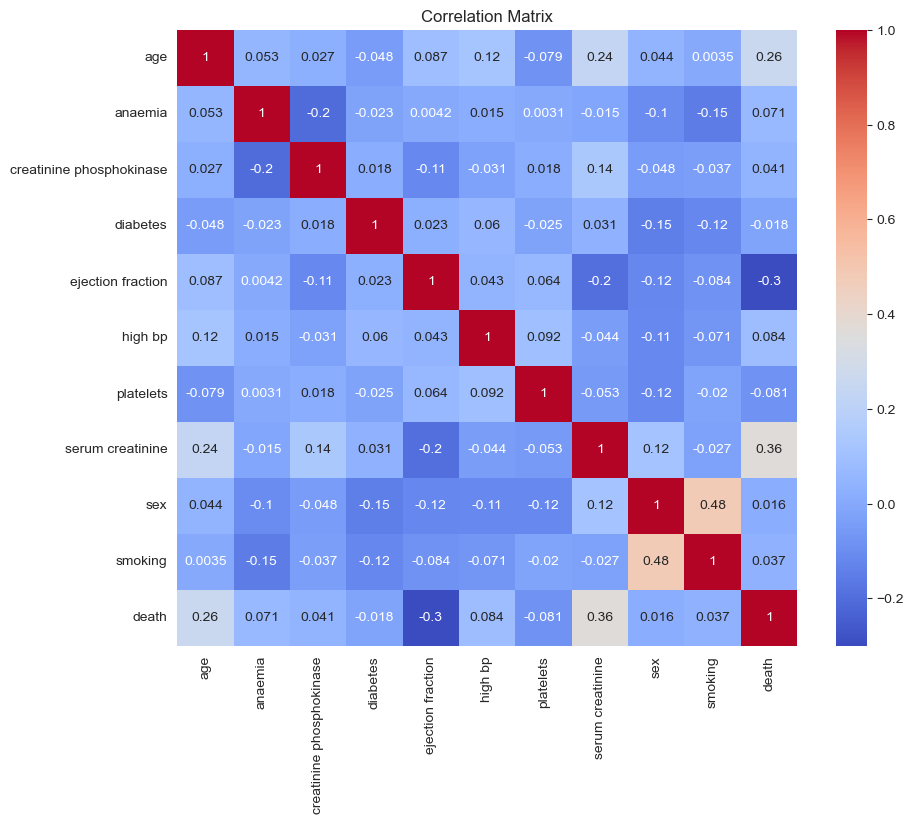

In [62]:
# View correlations to understand feature relationships
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [64]:


# Define your features (X) and target (y)
X = data.drop(columns=['death'])  # Use the correct column name
y = data['death']  # Also use the correct column name

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, check the shapes of the split datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(181, 10) (46, 10) (181,) (46,)


In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Sample dataset (replace with your actual dataset)
data = {
    'feature1': [0.5, 0.3, 0.8, 0.2, 0.6],
    'feature2': [1.0, 0.5, 1.5, 0.8, 1.2],
    'target': [0, 1, 0, 1, 0]  # Example target variable
}

df = pd.DataFrame(data)
X = df[['feature1', 'feature2']]
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model with class weights
logistic_model = LogisticRegression(class_weight='balanced')
logistic_model.fit(X_train, y_train)

# Make predictions with Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression model
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_logistic, labels=y.unique()))  # Use labels parameter
print(classification_report(y_test, y_pred_logistic, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

# Train Random Forest Classifier model with class weights
random_forest_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions with Random Forest Classifier
y_pred_rf = random_forest_model.predict(X_test)  # Corrected line

# Evaluate Random Forest Classifier model
print("\nRandom Forest Classifier Results:")
print(confusion_matrix(y_test, y_pred_rf, labels=y.unique()))  # Use labels parameter
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Results:
[[0 0]
 [0 1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Accuracy: 1.0

Random Forest Classifier Results:
[[0 0]
 [0 1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Accuracy: 1.0


In [33]:
# Predictions with adjusted threshold
y_prob = logistic_model.predict_proba(X_test)[:, 1]
threshold = 0.4  # Adjust as needed
y_pred_logistic = (y_prob >= threshold).astype(int)

# Evaluate the model
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic, zero_division=1))  # or zero_division=0
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))


Logistic Regression Results:
[[0 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       1.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.50      0.50      0.00       1.0
weighted avg       1.00      0.00      0.00       1.0

Accuracy: 0.0


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define your features (X) and target (y)
X = data.drop(columns=['death'])  # Use the correct column name
y = data['death']  # Also use the correct column name

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model with increased iterations
model = LogisticRegression(max_iter=200)  # Increase max_iter as needed
model.fit(X_train_scaled, y_train)

# Optionally, check the model's performance
print("Training completed.")


Training completed.


Class distribution in target variable:
 death
0    203
1     96
Name: count, dtype: int64
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.80      0.64      0.71        25

    accuracy                           0.78        60
   macro avg       0.79      0.76      0.77        60
weighted avg       0.79      0.78      0.78        60



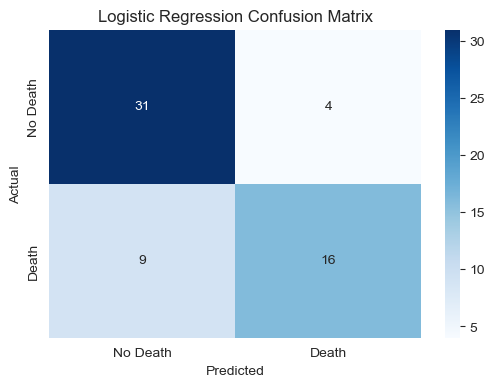

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



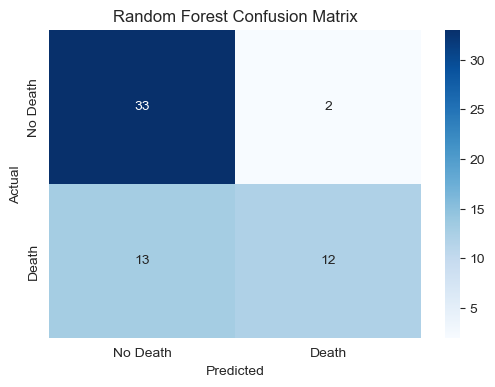

In [66]:




# Define your features (X) and target (y)
X = data.drop(columns=['death'])  # Adjust to your actual target variable name
y = data['death']

# Check class distribution
print("Class distribution in target variable:\n", y.value_counts())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# Logistic Regression
# ---------------------------
lr_model = LogisticRegression(max_iter=200, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)
lr_y_pred = lr_model.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_y_pred, zero_division=0))
lr_cm = confusion_matrix(y_test, lr_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Death', 'Death'], yticklabels=['No Death', 'Death'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# ---------------------------
# Random Forest
# ---------------------------
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred, zero_division=0))
rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Death', 'Death'], yticklabels=['No Death', 'Death'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [2]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Example dataset

# Load example dataset (replace with your own data)
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [3]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Example dataset

# Load example dataset (replace with your own data)
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load example dataset (replace with your own data)
data = load_iris()
X = data.data
y = data.target

# Create Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validated scores: {scores}")
print(f"Mean accuracy: {scores.mean() * 100:.2f}%")


Cross-validated scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean accuracy: 96.67%


In [5]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris  # Example dataset

# Load example dataset (replace with your own data)
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Perform cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"\nCross-validated scores: {cross_val_scores}")
print(f"Mean accuracy from cross-validation: {cross_val_scores.mean() * 100:.2f}%")


Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Cross-validated scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean accuracy from cross-validation: 97.33%
